In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="rdPS5rXQygoUZ3pAfIrB")
project = rf.workspace("woxsen-university-nvhyb").project("tumor-detection-rnn7u")
dataset = project.version(1).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled 

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tumor-Detection-1 in yolov5pytorch:: 100%|██████████| 6010/6010 [00:00<00:00, 6836.98it/s]


In [ ]:
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

100%|██████████| 4.11M/4.11M [00:00<00:00, 72.7MB/s]

100%|██████████| 14.9M/14.9M [00:00<00:00, 73.4MB/s]

100%|██████████| 42.4M/42.4M [00:00<00:00, 231MB/s]

100%|██████████| 91.9M/91.9M [00:01<00:00, 58.3MB/s]

100%|██████████| 170M/170M [00:02<00:00, 74.7MB/s]



segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/Tumor-Detection-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=

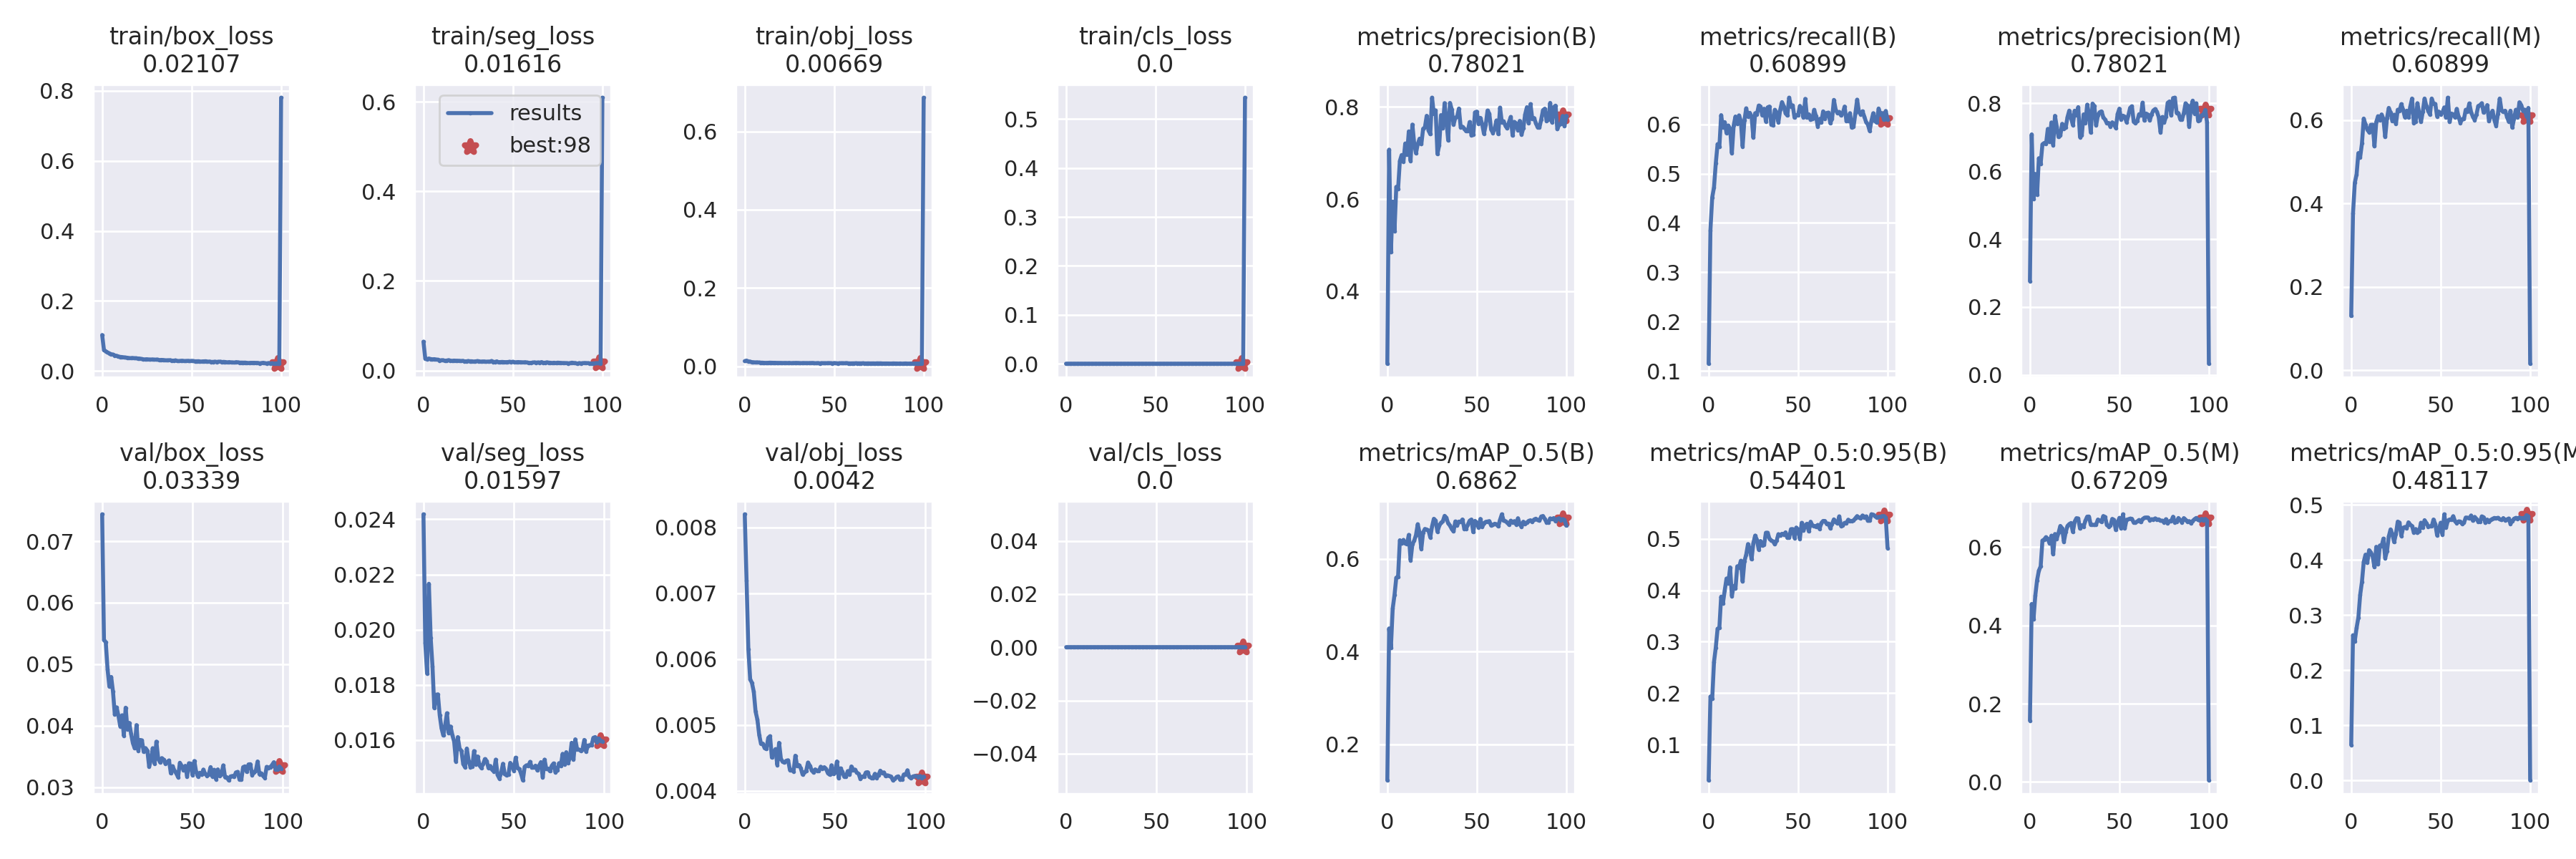

In [ ]:
!python segment/train.py --img 320 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt
display.Image(filename=f'runs/train-seg/exp/results.png', width=1200)

In [ ]:
!python segment/val.py --weights runs/train-seg/exp/weights/best.pt --data {dataset.location}/data.yaml --img 320


segment/val: data=/content/yolov5/Tumor-Detection-1/data.yaml, weights=['runs/train-seg/exp/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /content/yolov5/Tumor-Detection-1/valid/labels.cache... 601 images, 291 backgrounds, 0 corrupt: 100% 601/601 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/yolov5/Tumor-Detection-1/valid/images/no276_jpg.rf.217b98fcaa875dd99369eeaebd7730e4.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1

In [ ]:
!python segment/predict.py --img 320 --weights runs/train-seg/exp/weights/best.pt --source {/content/yolov5/Tumor-Detection-1/test/images}


segment/predict: weights=['runs/train-seg/exp/weights/best.pt'], source={/content/yolov5/Tumor-Detection-1/test/images}, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
Traceback (most recent call last):
  File "/content/yolov5/segment/predict.py", line 285, in <module>
    main(opt)
  File "/content/yolov5/segment/predict.py", line 280, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", lin

In [ ]:
!python segment/predict.py --img 320 --weights runs/train-seg/exp/weights/best.pt --source /content/yolov5/Tumor-Detection-1/test/images


segment/predict: weights=['runs/train-seg/exp/weights/best.pt'], source=/content/yolov5/Tumor-Detection-1/test/images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
image 1/300 /content/yolov5/Tumor-Detection-1/test/images/No13_jpg.rf.c80dfd66029df9eb6efe4973e731e453.jpg: 320x320 (no detections), 7.6ms
image 2/300 /content/yolov5/Tumor-Detection-1/test/images/No15_jpg.rf.eb598593a2fb4bfb761eb3f0acf3c403.jpg: 320x320 (no detections), 8.1ms
imag

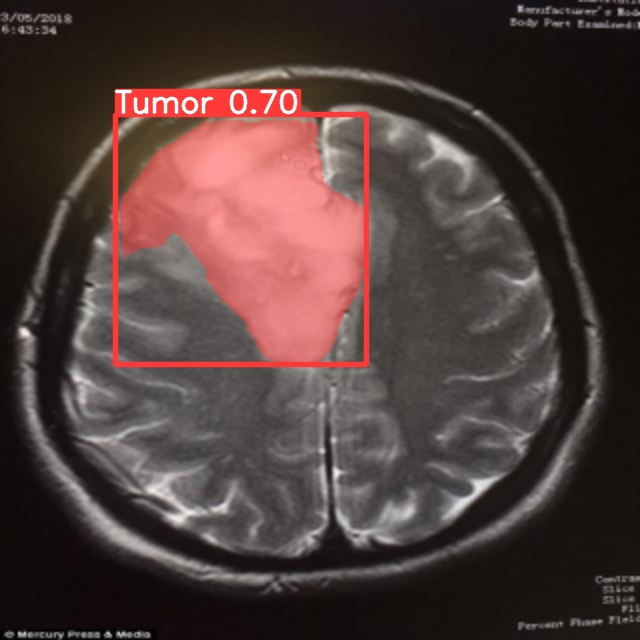

In [ ]:
from IPython.display import Image

# Replace 'image_filename.png' with the actual filename and path to your image.
Image(filename='/content/yolov5/runs/predict-seg/exp4/y1308_jpg.rf.5e083330d9d3d236d0c81285994821e8.jpg', width=600)


In [ ]:
!python export.py --weights runs/train-seg/exp/weights/best.pt --img-size 320 --dynamic --simplify


export: data=data/coco128.yaml, weights=['runs/train-seg/exp/weights/best.pt'], imgsz=[320], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=True, simplify=True, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript']
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs

PyTorch: starting from runs/train-seg/exp/weights/best.pt with output shape (1, 6300, 38) (14.4 MB)

TorchScript: starting export with torch 2.0.1+cu118...
TorchScript: export success ✅ 1.7s, saved as runs/train-seg/exp/weights/best.torchscript (28.5 MB)

Export complete (2.3s)
Results saved to /content/yolov5/runs/train-seg/exp/weights
Detect:          python segment/predict.py --weights runs/train-seg/exp/weights/best.torchscript 
Validate:        python segment

In [ ]:
pip install tensorflow
